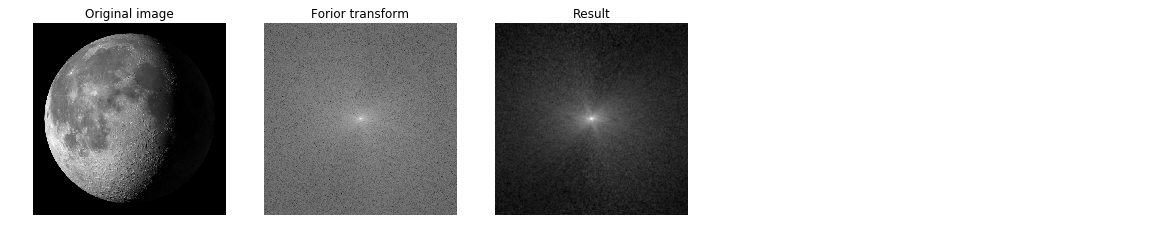

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('moon.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('i.png',cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
blur = cv2.blur(magnitude_spectrum,(5,5))


fig, axes = plt.subplots(ncols=5, figsize=(20, 4))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(magnitude_spectrum, cmap=plt.cm.gray)
ax[1].set_title('Forior transform')

ax[2].imshow(blur, cmap=plt.cm.gray)
ax[2].set_title('Result')




for a in ax:
    a.axis('off')

plt.show()

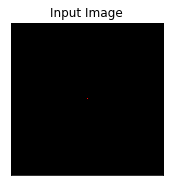

In [58]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
img = Image.fromarray(data, 'RGB')
img.save('my.png')
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [60]:
import numpy as np
 
fc = 0.1  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)
 
# Compute sinc filter.
h = np.sinc(2 * fc * (n - (N - 1) / 2.))
 
# Compute Blackman window.
w = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + \
    0.08 * np.cos(4 * np.pi * n / (N - 1))
 
# Multiply sinc filter with window.
h = h * w
 
# Normalize to get unity gain.
h = h / np.sum(h)

SyntaxError: invalid character in identifier (<ipython-input-60-f33558c60580>, line 2)

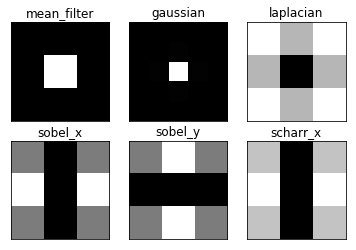

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

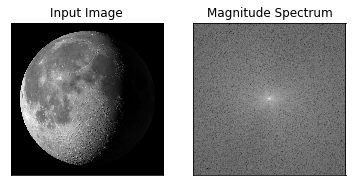

TypeError: slice indices must be integers or None or have an __index__ method

In [76]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('moon.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()